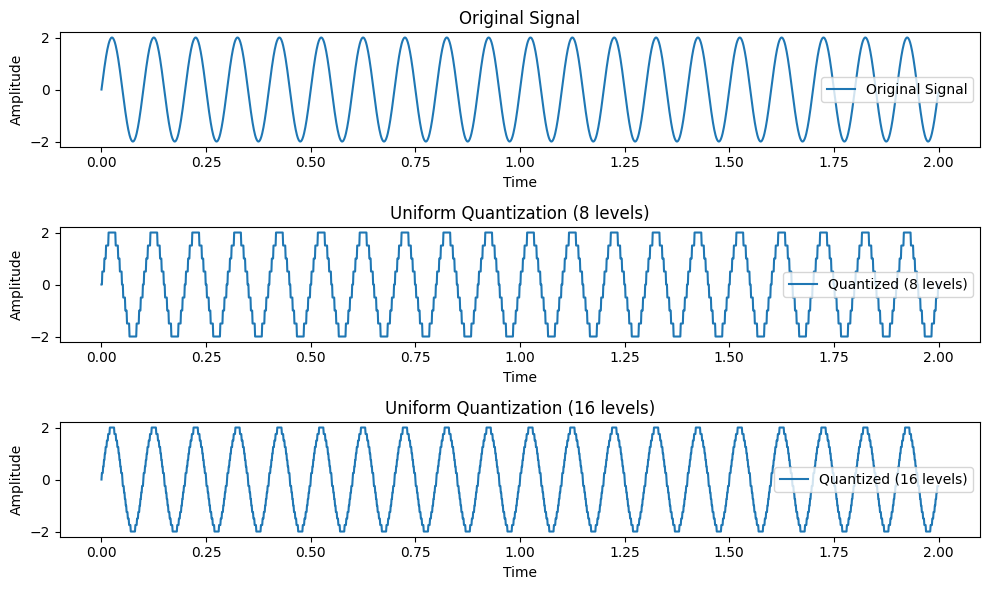

SQNR (8 levels): 20.216258440129522 dB
SQNR (16 levels): 25.716741505738852 dB


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a sinusoidal signal
def generate_sinusoidal_signal(amplitude, frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    return t, signal

# Function to perform uniform quantization
def uniform_quantization(signal, num_levels):
    max_amplitude = max(abs(signal))
    step_size = 2 * max_amplitude / num_levels
    quantized_signal = np.round(signal / step_size) * step_size
    return quantized_signal

# Function to calculate Signal-to-Quantization Noise Ratio (SQNR)
def calculate_sqnr(original_signal, quantized_signal):
    noise = original_signal - quantized_signal
    signal_power = np.sum(original_signal**2)
    noise_power = np.sum(noise**2)
    sqnr = 10 * np.log10(signal_power / noise_power)
    return sqnr

# Parameters
amplitude = 2
frequency = 10
duration = 2  # Two cycles
sampling_rate = 1000
num_levels_8 = 8
num_levels_16 = 16

# Generate sinusoidal signal
t, original_signal = generate_sinusoidal_signal(amplitude, frequency, duration, sampling_rate)

# Uniform quantization with 8 levels
quantized_signal_8 = uniform_quantization(original_signal, num_levels_8)
sqnr_8 = calculate_sqnr(original_signal, quantized_signal_8)

# Uniform quantization with 16 levels
quantized_signal_16 = uniform_quantization(original_signal, num_levels_16)
sqnr_16 = calculate_sqnr(original_signal, quantized_signal_16)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, original_signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, quantized_signal_8, label='Quantized (8 levels)')
plt.title('Uniform Quantization (8 levels)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, quantized_signal_16, label='Quantized (16 levels)')
plt.title('Uniform Quantization (16 levels)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Print SQNR values
print(f'SQNR (8 levels): {sqnr_8} dB')
print(f'SQNR (16 levels): {sqnr_16} dB')
